In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
# 1. 데이터 불러오기
x_iqr = pd.read_csv("x_iqr.csv")
y_iqr = pd.read_csv("y_iqr.csv")

In [6]:
from sklearn.preprocessing import StandardScaler
# 학습 : 검증 : 테스트 = 6 : 3 : 1 데이터 분리
X_train, X_valid, Y_train, Y_valid = train_test_split(x_iqr, y_iqr.iloc[:,0], test_size=0.4, random_state=2021)
X_valid, X_test, Y_valid, Y_test = train_test_split(X_valid, Y_valid, test_size=0.25, random_state=2021)

# StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_RB = scaler.transform(X_train)
X_valid_RB = scaler.transform(X_valid)
X_test_RB = scaler.transform(X_test)

In [7]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [109]:
from sklearn.ensemble import RandomForestRegressor
model_rfr_st = RandomForestRegressor(oob_score=True).fit(X_train_RB, Y_train)

train_y_pred_st = model_rfr_st.predict(X_train_RB)


print('=============Train=============')
print('RobustScaler')
print("Training MSE : {:.3f}".format(mean_squared_error(Y_train, train_y_pred_st)))
print("Training RMSE : {:.3f}".format(np.sqrt(mean_squared_error(Y_train, train_y_pred_st))))
print("Training MAE : {:.3f}".format(mean_absolute_error(Y_train, train_y_pred_st)))
print("Training MAPE : {:.3f}".format(mean_absolute_percentage_error(Y_train, train_y_pred_st)))
print("Training R2 : {:.3f}".format(r2_score(Y_train, train_y_pred_st)))

test_y_pred_st = model_rfr_st.predict(X_test_RB)

print('\n=============Test=============')
print('RobustScaler')
print("Training MSE : {:.3f}".format(mean_squared_error(Y_test, test_y_pred_st)))
print("Training RMSE : {:.3f}".format(np.sqrt(mean_squared_error(Y_test, test_y_pred_st))))
print("Training MAE : {:.3f}".format(mean_absolute_error(Y_test, test_y_pred_st)))
print("Training MAPE : {:.3f}".format(mean_absolute_percentage_error(Y_test, test_y_pred_st)))
print("Training R2 : {:.3f}".format(r2_score(Y_test, test_y_pred_st)))


=============Train=============
RobustScaler
Training MSE : 0.121
Training RMSE : 0.348
Training MAE : 0.256
Training MAPE : 0.450
Training R2 : 0.915

=============Test=============
RobustScaler
Training MSE : 0.905
Training RMSE : 0.951
Training MAE : 0.702
Training MAPE : 1.234
Training R2 : 0.394


In [ ]:
from sklearn.metrics import confusion_matrix

cm = pd.DataFrame(confusion_matrix(Y_test, test_y_pred_st), columns=iris.target_names, index=iris.target_names)
sns.heatmap(cm, annot=True)

In [28]:
x_iqr.columns

Index(['x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10',
       ...
       'x_391', 'x_392', 'x_393', 'x_394', 'x_395', 'x_396', 'x_397', 'x_398',
       'x_399', 'x_400'],
      dtype='object', length=341)

In [25]:
model_f = model_rfr_st.feature_importances_

In [27]:
model_f

array([4.48841393e-03, 4.15720473e-03, 2.14350763e-04, 4.22552811e-03,
       7.53164741e-03, 8.63003278e-05, 1.12353700e-01, 1.56812962e-02,
       2.43345015e-02, 2.08765664e-03, 1.60377465e-03, 1.14395301e-03,
       8.75864441e-04, 8.31041572e-04, 6.23212593e-04, 6.12029157e-04,
       6.66989917e-04, 8.28667831e-04, 1.23854804e-03, 8.55883358e-03,
       2.43507968e-03, 1.87153607e-03, 1.35382827e-03, 1.27114253e-03,
       9.96144423e-04, 1.45279777e-03, 1.16226783e-03, 1.52458469e-03,
       9.28520126e-04, 1.73550266e-03, 4.00120584e-03, 1.34877571e-03,
       2.08123591e-03, 5.55988929e-04, 2.18514595e-03, 5.36328859e-03,
       4.01303435e-03, 4.11132290e-03, 2.38125193e-03, 2.36839239e-03,
       2.39149447e-03, 2.30187947e-03, 5.42652459e-02, 1.25412613e-02,
       5.35080854e-03, 3.79457204e-03, 4.71983449e-02, 7.20176232e-03,
       3.67255936e-03, 2.77266518e-03, 2.94038082e-03, 2.81255028e-03,
       1.76396212e-03, 2.75914762e-03, 2.38640513e-03, 2.26654468e-03,
      

In [107]:
model_rfr_st.estimators_

[DecisionTreeRegressor(max_features='auto', random_state=1847649258),
 DecisionTreeRegressor(max_features='auto', random_state=1735397835),
 DecisionTreeRegressor(max_features='auto', random_state=232924904),
 DecisionTreeRegressor(max_features='auto', random_state=473828479),
 DecisionTreeRegressor(max_features='auto', random_state=115744670),
 DecisionTreeRegressor(max_features='auto', random_state=231492650),
 DecisionTreeRegressor(max_features='auto', random_state=148148018),
 DecisionTreeRegressor(max_features='auto', random_state=97412538),
 DecisionTreeRegressor(max_features='auto', random_state=1021372367),
 DecisionTreeRegressor(max_features='auto', random_state=72050338),
 DecisionTreeRegressor(max_features='auto', random_state=1635405180),
 DecisionTreeRegressor(max_features='auto', random_state=917986266),
 DecisionTreeRegressor(max_features='auto', random_state=94331179),
 DecisionTreeRegressor(max_features='auto', random_state=1787144452),
 DecisionTreeRegressor(max_featu

In [98]:
rf_opt_var_imp = pd.Series(model_rfr_st.feature_importances_, index=x_iqr.columns)
sort = rf_opt_var_imp.sort_values(ascending=False)
sort = sort[[20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1,0]]

In [99]:
sort

x_110    0.005504
x_382    0.005525
x_376    0.005626
x_363    0.005632
x_383    0.006189
x_386    0.006280
x_379    0.006611
x_48     0.007202
x_5      0.007532
x_20     0.008559
x_380    0.008861
x_113    0.011999
x_44     0.012541
x_8      0.015681
x_388    0.018308
x_93     0.021696
x_94     0.022697
x_9      0.024335
x_47     0.047198
x_43     0.054265
x_7      0.112354
dtype: float64

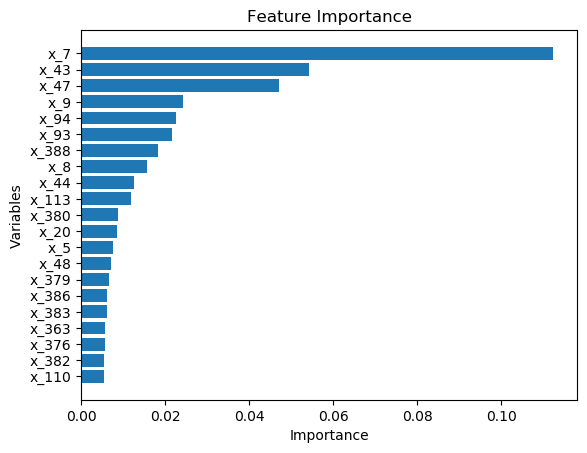

In [100]:
import matplotlib.pyplot as plt

plt.barh(sort.index,sort.values)
plt.title('Feature Importance')
plt.ylabel('Variables')
plt.xlabel('Importance')
plt.show()